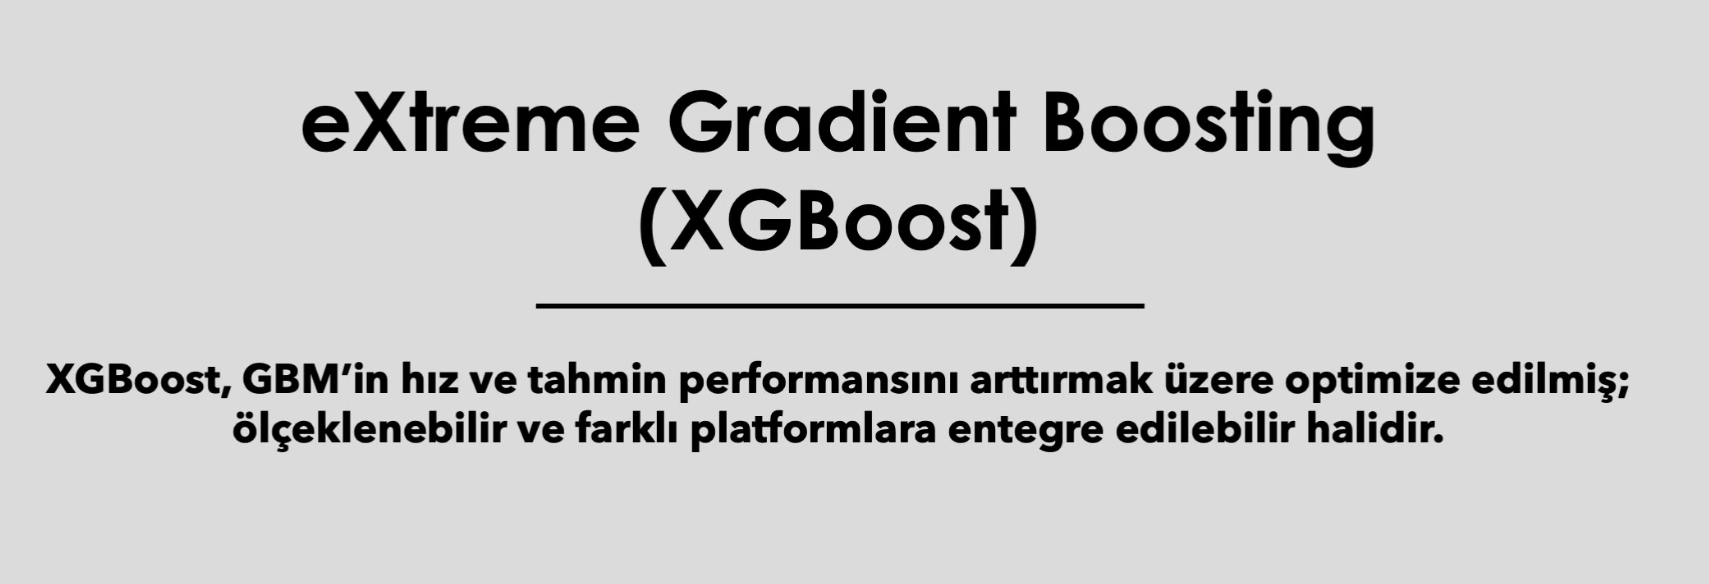

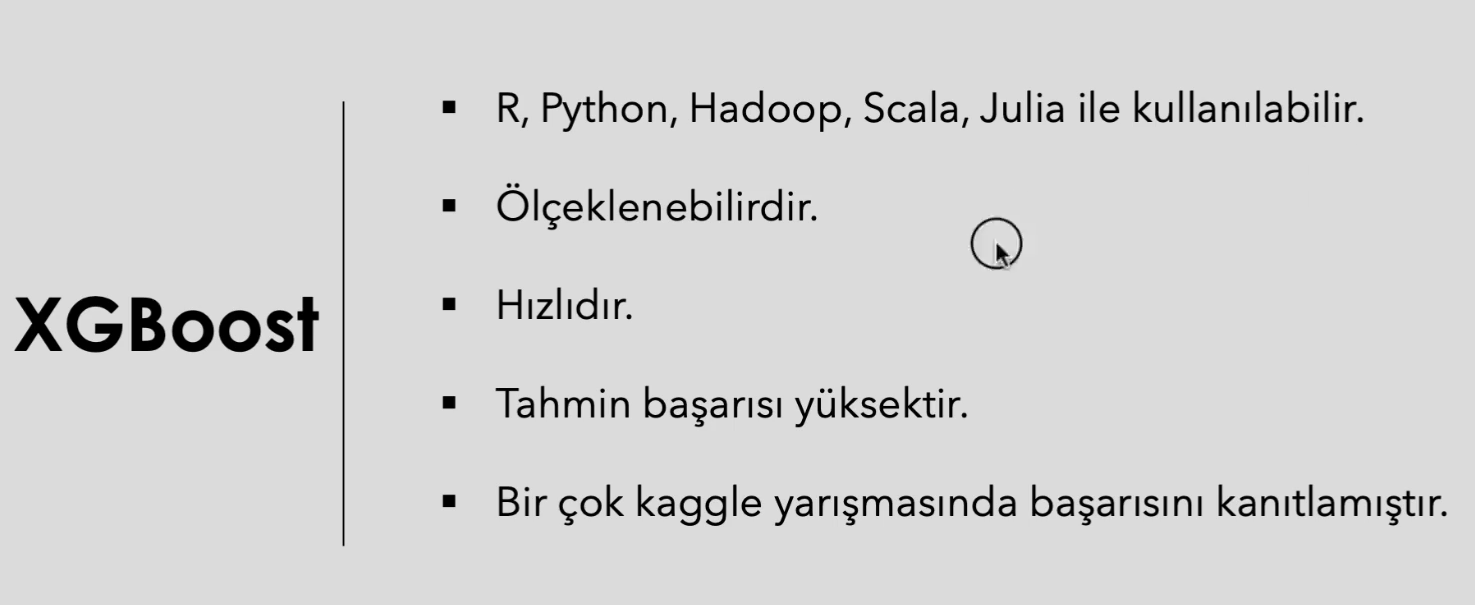

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'],axis=1).astype("float64")
X = pd.concat([X_ ,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X , y, test_size=0.25, random_state=42)

In [1]:
#!pip install xgboost

In [7]:
import xgboost as xgb

In [8]:
DM_Train = xgb.DMatrix(data=X_Train, label = Y_Train)
DM_Test = xgb.DMatrix(data=X_Test, label=Y_Test)

In [9]:
from xgboost import XGBRegressor

In [11]:
xgb_model = XGBRegressor().fit(X_Train, Y_Train)

### Tahmin

In [12]:
y_pred = xgb_model.predict(X_Test)
np.sqrt(mean_squared_error(Y_Test, y_pred))

355.46515176059927

### Model Tuning

In [13]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [14]:
xgb_grid = {
    'colsample_bytree' : [0.4, 0.5, 0.6, 0.9, 1],
    'n_estimators' : [100, 200, 500, 1000],
    'max_depth' : [2,3,4,5,6],
    'learning_rate' : [0.1, 0.01, 0.5]
}


In [18]:
xgb = XGBRegressor()
xgb_cv = GridSearchCV(   xgb, 
                         param_grid=xgb_grid,
                         cv=10,
                         n_jobs=-1,
                         verbose=2 )
xgb_cv.fit(X_Train, Y_Train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [19]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [31]:
xgb_tuned = XGBRegressor(colsample_bytree=0.5, 
                         learning_rate=0.1,
                         max_depth=2,
                         n_estimators=500)

xgb_tuned = xgb_tuned.fit(X_Train, Y_Train)

In [32]:
y_pred = xgb_tuned.predict(X_Test)
np.sqrt(mean_squared_error(Y_Test, y_pred))

346.0275204366939